In [1]:
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from transform_audio import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

# data_dir  = os.path.join(ROOT_DIR, 'raw-data', 'ravdess', 'full-ravdess-wav')
# # iterate over files in that directory
# file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
# file_names = os.listdir(data_dir)

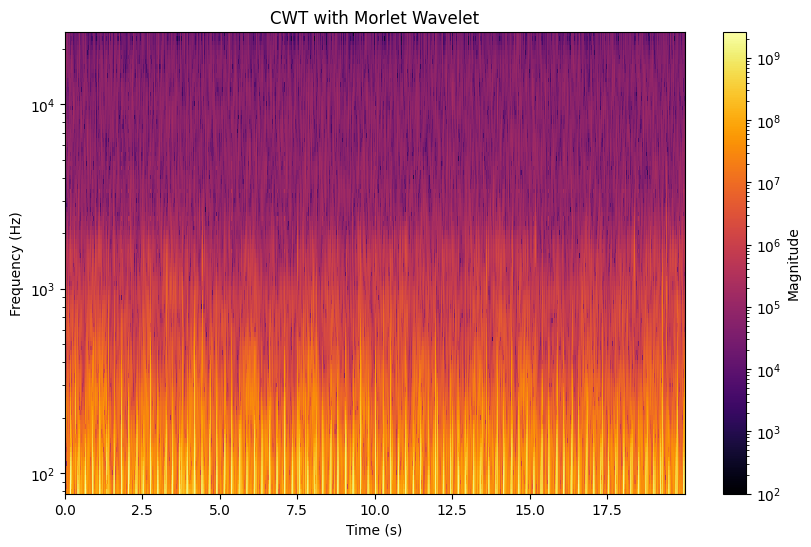

In [5]:
coefs, freqs = cwt_file('/Users/benrabin/Downloads/101_1b1_Al_sc_Meditron.wav', visualize=True)

In [9]:
abs(coefs).min()

2.8805313

In [7]:
np.isclose(coefs, 0).mean()

0.0

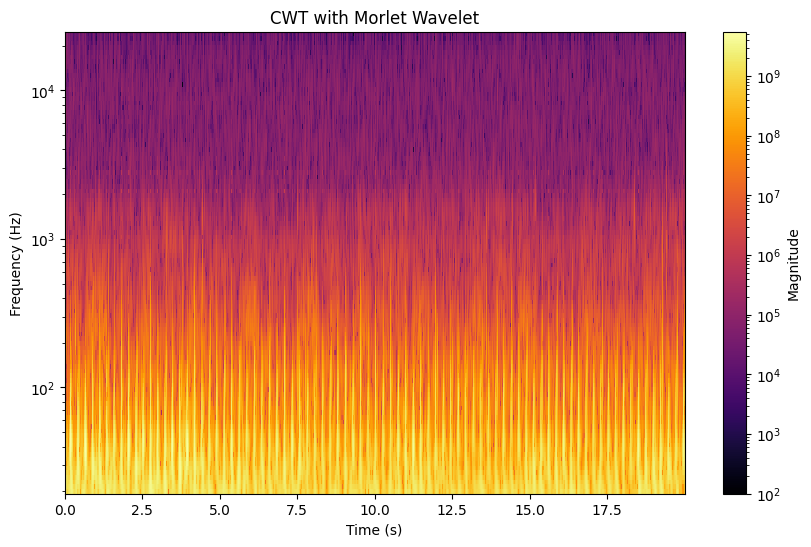

In [10]:
coefs, freqs = cwt_file('/Users/benrabin/Downloads/101_1b1_Al_sc_Meditron.wav', low_freq=20, visualize=True)

In [14]:
import librosa
librosa.load('/Users/benrabin/Downloads/101_1b1_Al_sc_Meditron.wav', sr=None)

(array([0.09454346, 0.09487915, 0.09509277, ..., 0.08190918, 0.08169556,
        0.08163452], dtype=float32),
 44100)

In [12]:
from scipy.io import wavfile

In [15]:
wavfile.read('/Users/benrabin/Downloads/101_1b1_Al_sc_Meditron.wav')

(44100,
 array([203030528, 203751424, 204210176, ..., 175898624, 175439872,
        175308800], dtype=int32))

In [20]:
def fft_file(file_path, n=None, discard_negative=True, visualize=False, title='Fourier Spectrum'):
    signal, rate = librosa.load(file_path)
    coefs = np.fft.fft(signal, n)
    freqs = np.fft.fftfreq(len(signal) if n is None else n, 1/rate)
    if discard_negative:
        negative_idx = len(freqs) // 2
        coefs = coefs[:negative_idx]
        freqs = freqs[:negative_idx]

    if visualize:
        plt.plot(freqs, np.abs(coefs), lw=.1)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.yscale('log')
        plt.title(title)
        plt.show()
    
    return coefs, freqs

In [19]:
fft_file('/Users/benrabin/Downloads/101_1b1_Al_sc_Meditron.wav')

(array([-5.09648269e+10+0.00000000e+00j, -2.18214113e+10-1.98518759e+09j,
        -2.21089513e+10-5.20365840e+09j, ...,
        -4.13497847e+07+7.90732958e+07j, -3.57476470e+07-3.92386080e+07j,
         3.85345126e+07-5.36844498e+06j]),
 array([0.000000e+00, 5.000000e-02, 1.000000e-01, ..., 2.204985e+04,
        2.204990e+04, 2.204995e+04]))

In [21]:
fft_file('/Users/benrabin/Downloads/101_1b1_Al_sc_Meditron.wav')

(array([-11.879544  +0.0000000e+00j,  -5.094119  -4.6223718e-01j,
         -5.1610303 -1.2115681e+00j, ...,  -0.04478431-1.3088081e-05j,
         -0.04478344-6.1584656e-06j,  -0.04478744-2.4168642e-07j],
       dtype=complex64),
 array([0.000000e+00, 5.000000e-02, 1.000000e-01, ..., 1.102485e+04,
        1.102490e+04, 1.102495e+04]))